In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
full=pd.concat([train, test], ignore_index=True)
full.shape

(1309, 12)

## Fill Null Values

In [6]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [7]:
full.isnull().sum().sort_values(ascending=False)

Cabin          1014
Survived        418
Age             263
Embarked          2
Fare              1
Ticket            0
SibSp             0
Sex               0
Pclass            0
PassengerId       0
Parch             0
Name              0
dtype: int64

In [8]:
survived_store=full.pop('Survived')

In [9]:
numeric_cols=full.columns[full.dtypes != 'object']
numeric_cols

Index(['Age', 'Fare', 'Parch', 'PassengerId', 'Pclass', 'SibSp'], dtype='object')

In [10]:
numeric_cols_mean=full.loc[:, numeric_cols].mean()
full.loc[:, numeric_cols]=full.loc[:, numeric_cols].fillna(numeric_cols_mean)
full.isnull().sum()

Age               0
Cabin          1014
Embarked          2
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Ticket            0
dtype: int64

In [11]:
full['Embarked']=full['Embarked'].fillna('S')
full['Cabin']=full['Cabin'].fillna('U')
full.isnull().sum()

Age            0
Cabin          0
Embarked       0
Fare           0
Name           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Ticket         0
dtype: int64

## Feature Modification

In [12]:
# male is 1, female is 0
sex_mapDict={'male': 1, 'female': 0}
full['Sex'] = full['Sex'].map(sex_mapDict)

In [13]:
# one-hot encoding for Embarked
embarkedDF=pd.DataFrame()
embarkedDF=pd.get_dummies(full['Embarked'], prefix='Embarked')
full=pd.concat([full, embarkedDF], axis=1)
full.drop('Embarked', axis=1, inplace=True)
full.head()

,Age,Cabin,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,Embarked_C,Embarked_Q,Embarked_S
0,22.0,U,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,A/5 21171,0,0,1
1,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,PC 17599,1,0,0
2,26.0,U,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,STON/O2. 3101282,0,0,1
3,35.0,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,113803,0,0,1
4,35.0,U,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,373450,0,0,1


In [14]:
# one-hot encoding for pclass
pclassDF=pd.DataFrame()
pclassDF=pd.get_dummies(full['Pclass'], prefix='Pclass')
full=pd.concat([full, pclassDF], axis=1)
full.drop('Pclass', axis=1, inplace=True)
full.head()

,Age,Cabin,Fare,Name,Parch,PassengerId,Sex,SibSp,Ticket,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,U,7.2500,"Braund, Mr. Owen Harris",0,1,1,1,A/5 21171,0,0,1,0,0,1
1,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,0,1,PC 17599,1,0,0,1,0,0
2,26.0,U,7.9250,"Heikkinen, Miss. Laina",0,3,0,0,STON/O2. 3101282,0,0,1,0,0,1
3,35.0,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,0,1,113803,0,0,1,1,0,0
4,35.0,U,8.0500,"Allen, Mr. William Henry",0,5,1,0,373450,0,0,1,0,0,1


In [15]:
# Get title from Name column
def getTitle(name):
    str1=name.split(',')[1]
    str2=str1.split('.')[0]
    str3=str2.strip()
    return str3

In [16]:
titleDF=pd.DataFrame()
titleDF['Title']=full['Name'].map(getTitle)
titleDF.head()

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr


In [17]:
titleDF=pd.get_dummies(titleDF['Title'], prefix='Title')
titleDF.head()



,Title_Capt,Title_Col,Title_Don,Title_Dona,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [18]:
full=pd.concat([full, titleDF], axis=1)
full.drop('Name', axis=1, inplace=True)
full.head()

,Age,Cabin,Fare,Parch,PassengerId,Sex,SibSp,Ticket,Embarked_C,Embarked_Q,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,22.0,U,7.2500,0,1,1,1,A/5 21171,0,0,...,0,0,0,0,1,0,0,0,0,0
1,38.0,C85,71.2833,0,2,0,1,PC 17599,1,0,...,0,0,0,0,0,1,0,0,0,0
2,26.0,U,7.9250,0,3,0,0,STON/O2. 3101282,0,0,...,0,1,0,0,0,0,0,0,0,0
3,35.0,C123,53.1000,0,4,0,1,113803,0,0,...,0,0,0,0,0,1,0,0,0,0
4,35.0,U,8.0500,0,5,1,0,373450,0,0,...,0,0,0,0,1,0,0,0,0,0


In [19]:
cabinDF=pd.DataFrame()
full['Cabin']=full['Cabin'].map(lambda x: x[0])
cabinDF=pd.get_dummies(full['Cabin'], prefix='Cabin')

In [20]:
full=pd.concat([full, cabinDF], axis=1)
full.drop('Cabin', axis=1, inplace=True)
full.head()

,Age,Fare,Parch,PassengerId,Sex,SibSp,Ticket,Embarked_C,Embarked_Q,Embarked_S,...,Title_the Countess,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,22.0,7.2500,0,1,1,1,A/5 21171,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,38.0,71.2833,0,2,0,1,PC 17599,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,26.0,7.9250,0,3,0,0,STON/O2. 3101282,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,35.0,53.1000,0,4,0,1,113803,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,35.0,8.0500,0,5,1,0,373450,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [21]:
# Build the family relation
familyDF=pd.DataFrame()
familyDF['family_size']=full['Parch']+full['SibSp']+1
familyDF['small_family']=familyDF['family_size'].map(lambda x: 1 if x==1 else 0)
familyDF['middle_family']=familyDF['family_size'].map(lambda x: 1 if 2<=x>=4 else 0)
familyDF['large_family']=familyDF['family_size'].map(lambda x: 1 if x>=5 else 0)
familyDF.head()


,family_size,small_family,middle_family,large_family
0,2,0,0,0
1,2,0,0,0
2,1,1,0,0
3,2,0,0,0
4,1,1,0,0


In [22]:
full=pd.concat([full, familyDF], axis=1)
full.head()

,Age,Fare,Parch,PassengerId,Sex,SibSp,Ticket,Embarked_C,Embarked_Q,Embarked_S,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,family_size,small_family,middle_family,large_family
0,22.0,7.2500,0,1,1,1,A/5 21171,0,0,1,...,0,0,0,0,0,1,2,0,0,0
1,38.0,71.2833,0,2,0,1,PC 17599,1,0,0,...,0,0,0,0,0,0,2,0,0,0
2,26.0,7.9250,0,3,0,0,STON/O2. 3101282,0,0,1,...,0,0,0,0,0,1,1,1,0,0
3,35.0,53.1000,0,4,0,1,113803,0,0,1,...,0,0,0,0,0,0,2,0,0,0
4,35.0,8.0500,0,5,1,0,373450,0,0,1,...,0,0,0,0,0,1,1,1,0,0


## Get crucial features

In [23]:
full['Survived']=survived_store
full = full.loc[:,~full.columns.duplicated()]
corrDF=full.corr()
important_features=corrDF.sort_values('Survived', ascending=False)
important_features

,Age,Fare,Parch,PassengerId,Sex,SibSp,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,family_size,small_family,middle_family,large_family,Survived
Survived,-0.070323,0.257307,0.081629,-0.005007,-0.543351,-0.035322,0.168240,0.003650,-0.149683,0.285904,...,0.145321,0.057935,0.016040,-0.026456,-0.316912,0.016639,-0.203367,-0.029945,-0.125147,1.000000
Title_Mrs,0.200612,0.140508,0.217673,0.034473,-0.566111,0.065098,0.096979,-0.106257,-0.017969,0.140693,...,0.046974,0.014277,0.043209,-0.011638,-0.161607,0.161791,-0.362052,0.059525,0.014630,0.339040
Title_Miss,-0.253129,0.090383,0.068368,-0.050389,-0.669607,0.079622,-0.021905,0.200610,-0.108367,-0.018458,...,0.009414,-0.002608,0.062296,-0.013766,0.002724,0.089740,-0.027063,0.118395,0.084652,0.327093
Pclass_1,0.362587,0.599956,-0.013033,0.026495,-0.107371,-0.034256,0.325722,-0.166101,-0.181800,1.000000,...,0.242963,-0.073083,-0.035441,0.048310,-0.776987,-0.029656,-0.126551,-0.065383,-0.067523,0.285904
Fare,0.171521,1.000000,0.221522,0.031416,-0.185484,0.160224,0.286241,-0.130054,-0.169894,0.599956,...,0.073949,-0.037567,-0.022857,0.001179,-0.507197,0.226465,-0.274826,0.179535,0.170853,0.257307
Cabin_B,0.113458,0.393743,0.073051,0.015895,-0.094453,-0.011569,0.161595,-0.073613,-0.095790,0.399378,...,-0.041103,-0.029188,-0.014154,-0.006320,-0.423794,0.032318,-0.087912,0.045386,0.013470,0.175095
Embarked_C,0.076179,0.286241,-0.008635,0.048101,-0.066564,-0.048396,1.000000,-0.164166,-0.778262,0.325722,...,0.027566,-0.020010,-0.031566,-0.014095,-0.258257,-0.036553,-0.107874,-0.082121,-0.092825,0.168240
Cabin_D,0.132886,0.072737,-0.027385,0.000549,-0.057396,-0.015727,0.107782,-0.061459,-0.056023,0.275698,...,-0.034317,-0.024369,-0.011817,-0.005277,-0.353822,-0.025313,-0.074310,-0.062009,-0.049336,0.150716
Cabin_E,0.106600,0.073949,0.001084,-0.008136,-0.040340,-0.027180,0.027566,-0.042877,0.002960,0.242963,...,1.000000,-0.022961,-0.011135,-0.004972,-0.333381,-0.017285,-0.042535,-0.058427,-0.046485,0.145321
Cabin_C,0.167993,0.401370,0.009601,0.006092,-0.077473,0.048616,0.158043,-0.059151,-0.101861,0.485974,...,-0.050016,-0.035516,-0.017224,-0.007691,-0.515684,0.037226,-0.137498,0.010307,0.001362,0.114652


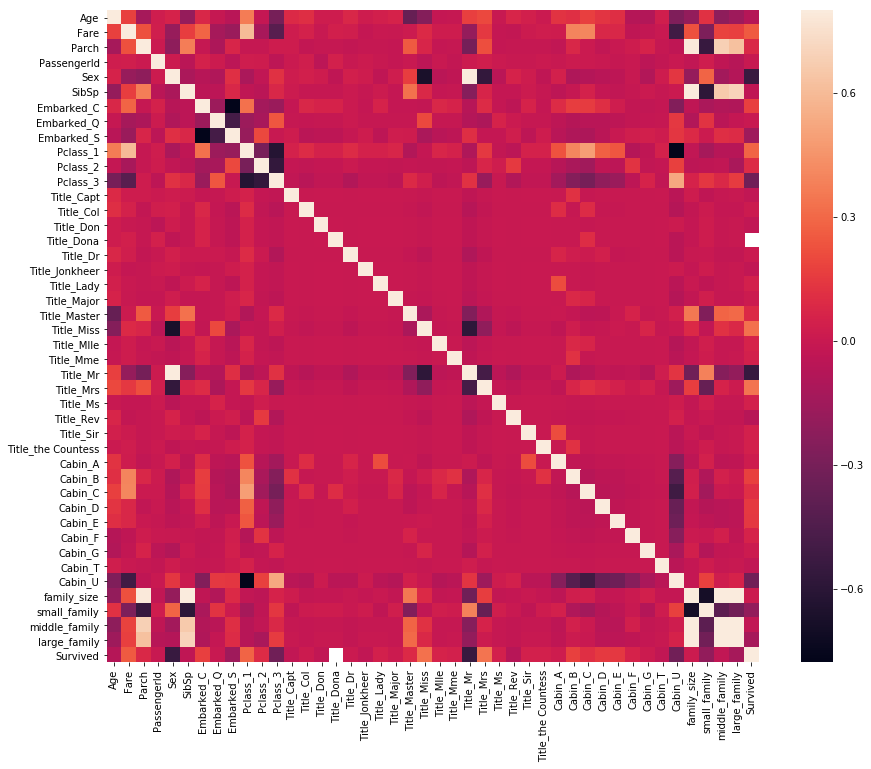

In [24]:
f, ax=plt.subplots(figsize=(15,12)) #Make a workspace
sns.heatmap(corrDF, vmax=0.8, square=True)

In [25]:
full_X=pd.concat([pclassDF, familyDF, full['Fare'], cabinDF, embarkedDF, full['Sex']], axis=1)
full_X.head()

,Pclass_1,Pclass_2,Pclass_3,family_size,small_family,middle_family,large_family,Fare,Cabin_A,Cabin_B,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Sex
0,0,0,1,2,0,0,0,7.2500,0,0,...,0,0,0,0,0,1,0,0,1,1
1,1,0,0,2,0,0,0,71.2833,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,1,1,0,0,7.9250,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,0,0,2,0,0,0,53.1000,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,1,1,0,0,8.0500,0,0,...,0,0,0,0,0,1,0,0,1,1


In [26]:
X_source=full_X.loc[0: 891-1, :]
y_source=full.loc[0:891-1, 'Survived']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_source, y_source, train_size=0.8)
X_predict=full_X.loc[891: , :]

## Train

In [34]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()

In [35]:
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
clf.score(X_test, y_test)

0.45680659885474983

In [37]:
y_pred=clf.predict(X_predict).astype(int)

In [40]:
passanger_id=full.loc[891:, 'PassengerId']
predDF=pd.DataFrame({'PassengerId': passanger_id, 'Survived': y_pred})

In [48]:
predDF[predDF.Survived == 1]

,PassengerId,Survived
939,940,1
950,951,1
965,966,1
1069,1070,1
1070,1071,1
1075,1076,1
1109,1110,1
1217,1218,1
1234,1235,1
1241,1242,1
